Copied from Vicky's analysis space (and edited)

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import cmocean
import xarray as xr

from salishsea_tools import nc_tools, viz_tools

%matplotlib inline

In [31]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.titlesize'] = 18

In [32]:
#mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask.nc')
mymesh = xr.open_dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask.nc')
e3t = mymesh['e3t_1d'][0]

In [33]:
t2015_phyto = xr.open_dataset('./mean_ptrc_2015.nc')
t2016_phyto = xr.open_dataset('./mean_ptrc_2016.nc')
t2017_phyto = xr.open_dataset('./mean_ptrc_2017.nc')
t2018_phyto = xr.open_dataset('./mean_ptrc_2018.nc')

In [34]:
t2015_totalphyto = (t2015_phyto['diatoms'][0] + t2015_phyto['flagellates'][0] 
                    + t2015_phyto['ciliates'][0])
t2016_totalphyto = (t2016_phyto['diatoms'][0] + t2016_phyto['flagellates'][0] 
                    + t2016_phyto['ciliates'][0])
t2017_totalphyto = (t2017_phyto['diatoms'][0] + t2017_phyto['flagellates'][0] 
                    + t2017_phyto['ciliates'][0])
t2018_totalphyto = (t2018_phyto['diatoms'][0] + t2018_phyto['flagellates'][0] 
                    + t2018_phyto['ciliates'][0])

In [35]:
print (mymesh.gdept_1d[0, 20:22])
lz = 22

<xarray.DataArray 'gdept_1d' (z: 2)>
array([ 24.100257,  28.229915])
Dimensions without coordinates: z


In [36]:
t2015_prod = xr.open_dataset('./mean_prod_2015.nc')
t2016_prod = xr.open_dataset('./mean_prod_2016.nc')
t2017_prod = xr.open_dataset('./mean_prod_2017.nc')
t2018_prod = xr.open_dataset('./mean_prod_2018.nc')

In [37]:
t2015_totalprod = (t2015_prod['PPDIAT'][0] + t2015_prod['PPPHY'][0] 
                    + t2015_prod['PPMRUB'][0])
t2016_totalprod = (t2016_prod['PPDIAT'][0] + t2016_prod['PPPHY'][0] 
                    + t2016_prod['PPMRUB'][0])
t2017_totalprod = (t2017_prod['PPDIAT'][0] + t2017_prod['PPPHY'][0] 
                    + t2017_prod['PPMRUB'][0])
t2018_totalprod = (t2018_prod['PPDIAT'][0] + t2018_prod['PPPHY'][0] 
                    + t2018_prod['PPMRUB'][0])
prod_mesh2015 = (t2015_totalprod-0.1/86400*t2015_totalphyto) > 0
prod_mesh2016 = (t2016_totalprod-0.1/86400*t2016_totalphyto) > 0
prod_mesh2017 = (t2017_totalprod-0.1/86400*t2017_totalphyto) > 0
prod_mesh2018 = (t2018_totalprod-0.1/86400*t2018_totalphyto) > 0

In [38]:
for i in range(lz):
    t2015_totalphyto[i] = t2015_totalphyto[i] * e3t[i] #* prod_mesh2015[i]
    t2016_totalphyto[i] = t2016_totalphyto[i] * e3t[i] #* prod_mesh2016[i]
    t2017_totalphyto[i] = t2017_totalphyto[i] * e3t[i] #* prod_mesh2017[i]
    t2018_totalphyto[i] = t2018_totalphyto[i] * e3t[i] #* prod_mesh2018[i]
t2015_totalphyto = t2015_totalphyto[:lz].sum(axis=0)
t2016_totalphyto = t2016_totalphyto[:lz].sum(axis=0)
t2017_totalphyto = t2017_totalphyto[:lz].sum(axis=0)
t2018_totalphyto = t2018_totalphyto[:lz].sum(axis=0)
print (t2015_totalphyto.shape)

tp_averages = 0.25* (t2015_totalphyto + t2016_totalphyto + t2017_totalphyto + t2017_totalphyto)
print (tp_averages.shape)

(898, 398)
(898, 398)


In [39]:
for i in range(lz):
    t2015_totalprod[i] = t2015_totalprod[i] * e3t[i]
    t2016_totalprod[i] = t2016_totalprod[i] * e3t[i]
    t2017_totalprod[i] = t2017_totalprod[i] * e3t[i]
    t2018_totalprod[i] = t2018_totalprod[i] * e3t[i]
t2015_totalprod = t2015_totalprod[:lz].sum(axis=0)
t2016_totalprod = t2016_totalprod[:lz].sum(axis=0)
t2017_totalprod = t2017_totalprod[:lz].sum(axis=0)
t2018_totalprod = t2018_totalprod[:lz].sum(axis=0)
print (t2015_totalprod.shape)

(898, 398)


In [40]:
tr_averages = 0.25* (t2015_totalprod + t2016_totalprod + t2017_totalprod + t2017_totalprod)
print (tr_averages.shape)

(898, 398)


In [41]:
t2015_graze = xr.open_dataset('./mean_dia2_2015.nc')
t2016_graze = xr.open_dataset('./mean_dia2_2016.nc')
t2017_graze = xr.open_dataset('./mean_dia2_2017.nc')
t2018_graze = xr.open_dataset('./mean_dia2_2018.nc')

In [42]:
t2015_totalgraze = (t2015_graze['GRMESZDIAT'][0] + t2015_graze['GRMESZMICZ'][0]
                   + t2015_graze['GRMESZMRUB'][0] + t2015_graze['GRMESZPHY'][0]
                   + t2015_graze['GRMESZPON'][0])
t2016_totalgraze = (t2016_graze['GRMESZDIAT'][0] + t2016_graze['GRMESZMICZ'][0]
                   + t2016_graze['GRMESZMRUB'][0] + t2016_graze['GRMESZPHY'][0]
                   + t2016_graze['GRMESZPON'][0])
t2017_totalgraze = (t2017_graze['GRMESZDIAT'][0] + t2017_graze['GRMESZMICZ'][0]
                   + t2017_graze['GRMESZMRUB'][0] + t2017_graze['GRMESZPHY'][0]
                   + t2017_graze['GRMESZPON'][0])
t2018_totalgraze = (t2018_graze['GRMESZDIAT'][0] + t2018_graze['GRMESZMICZ'][0]
                   + t2018_graze['GRMESZMRUB'][0] + t2018_graze['GRMESZPHY'][0]
                   + t2018_graze['GRMESZPON'][0])

In [43]:
for i in range(lz):
    t2015_totalgraze[i] = t2015_totalgraze[i] * e3t[i]
    t2016_totalgraze[i] = t2016_totalgraze[i] * e3t[i]
    t2017_totalgraze[i] = t2017_totalgraze[i] * e3t[i]
    t2018_totalgraze[i] = t2018_totalgraze[i] * e3t[i]
t2015_totalgraze = t2015_totalgraze[:lz].sum(axis=0)
t2016_totalgraze = t2016_totalgraze[:lz].sum(axis=0)
t2017_totalgraze = t2017_totalgraze[:lz].sum(axis=0)
t2018_totalgraze = t2018_totalgraze[:lz].sum(axis=0)
print (t2015_totalgraze.shape)

(898, 398)


In [44]:
tg_averages = 0.25* (t2015_totalgraze + t2016_totalgraze + t2017_totalgraze + t2017_totalgraze)
print (tg_averages.shape)

(898, 398)


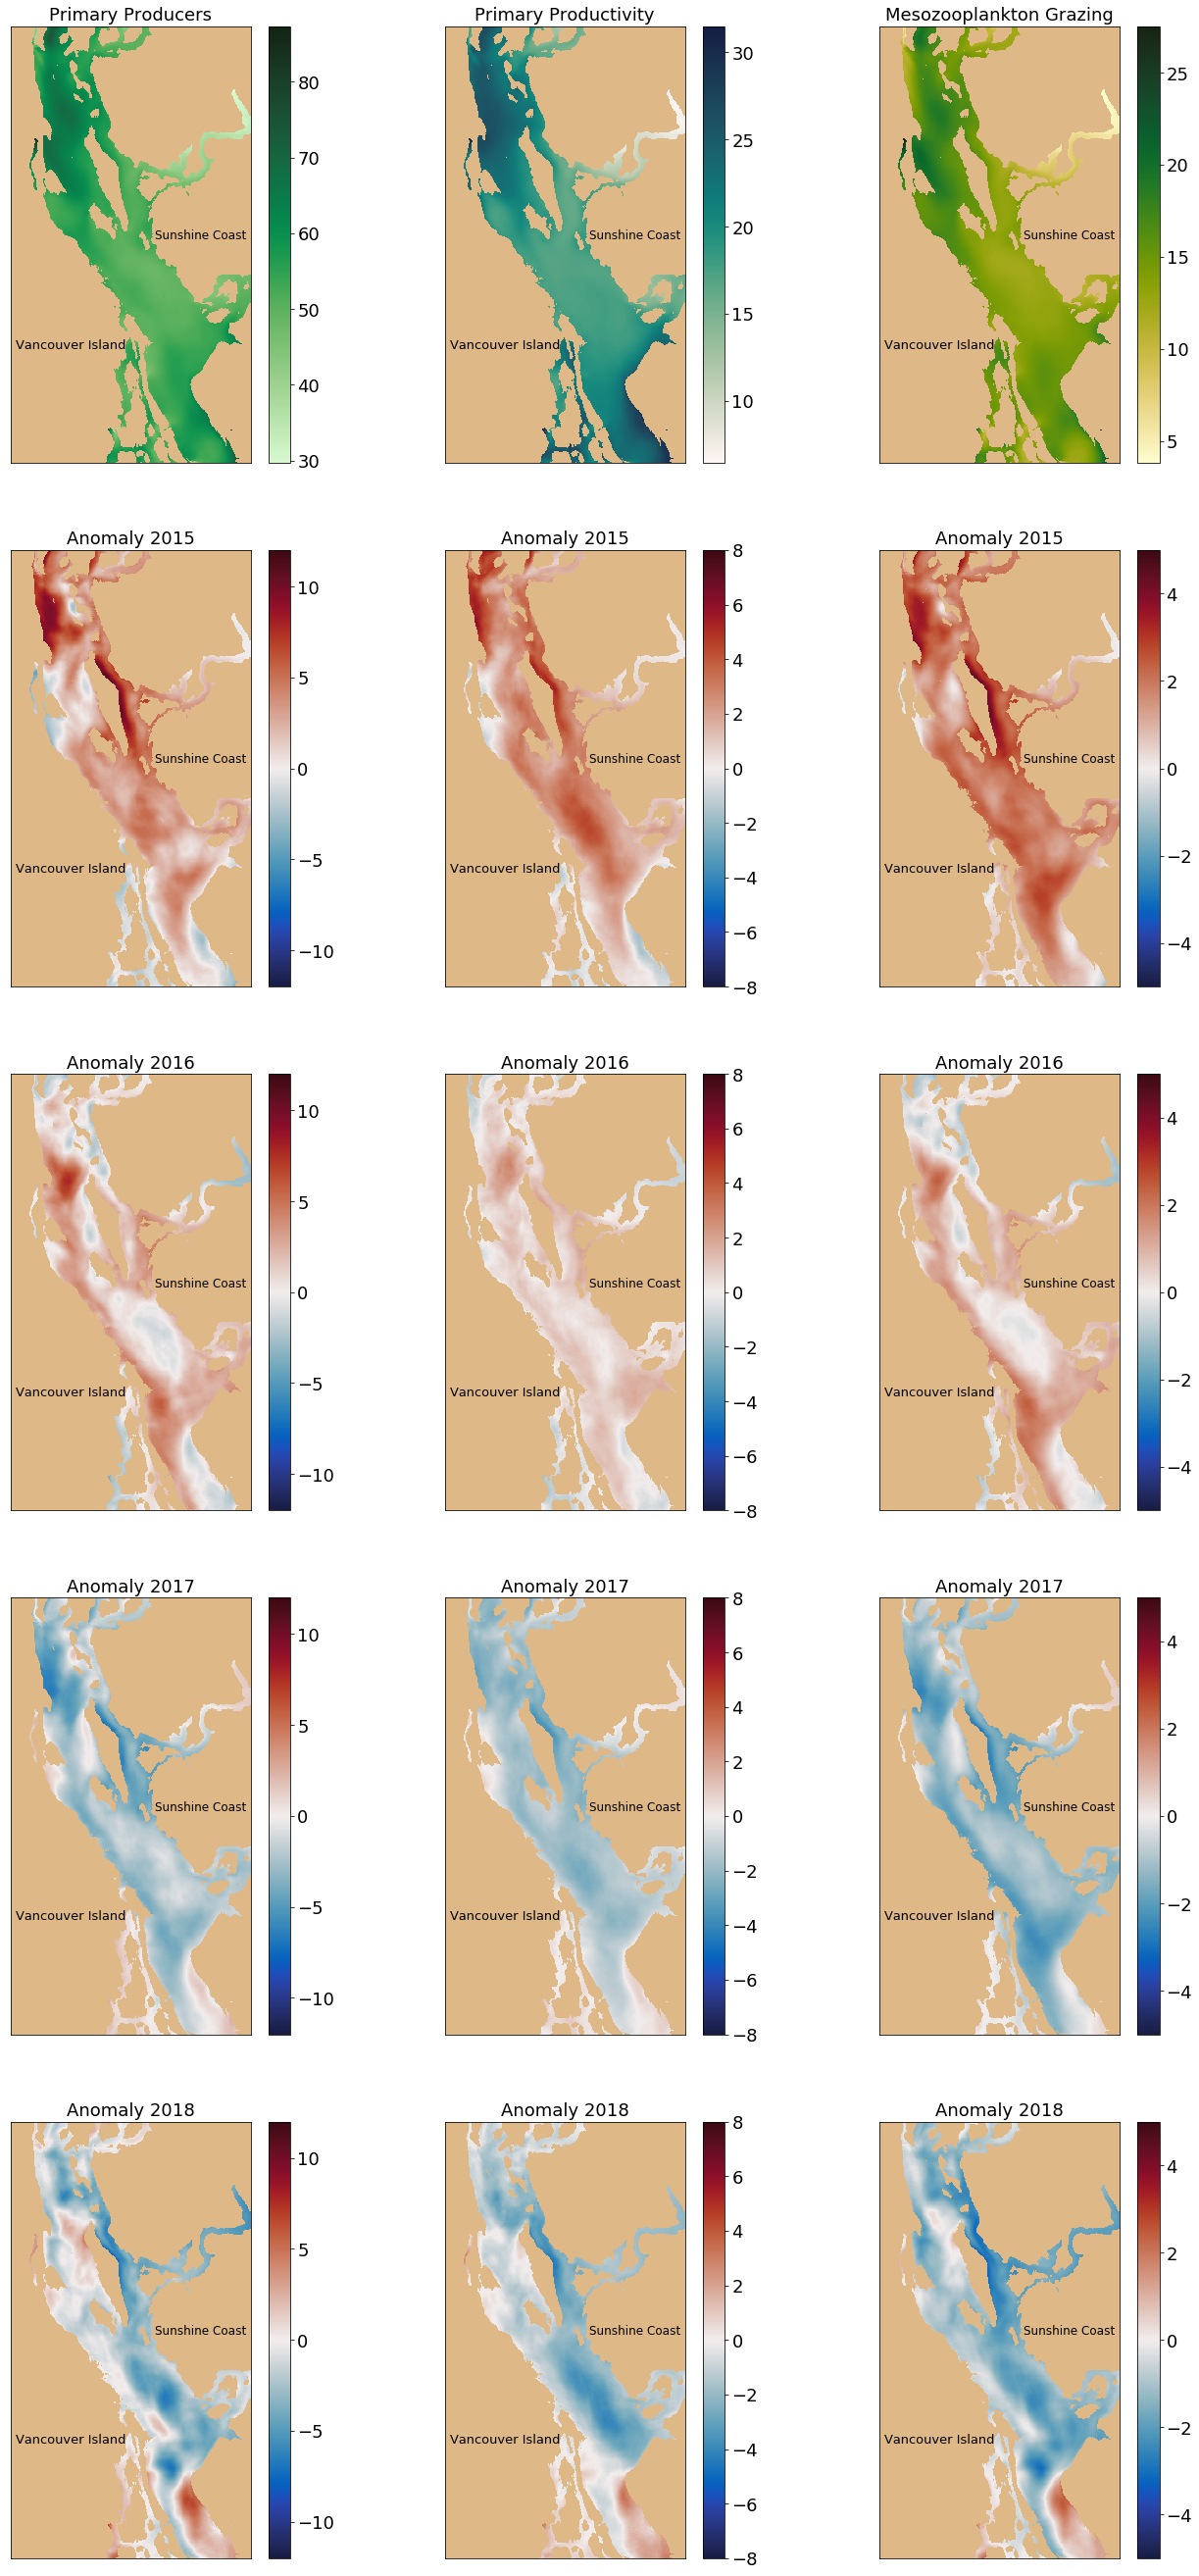

In [61]:
imin, imax = 350, 750
jmin, jmax = 100, 350
physcale = 1.
vmax = 12
vmin = -vmax
cmap = cmocean.cm.algae
cmap.set_bad('burlywood')

fig, axs = plt.subplots(5, 3,figsize = (7.5*3, 9.5*5))

#### PHYTO ####
s = axs[0, 0].pcolormesh(physcale*np.ma.masked_array(tp_averages[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap)
fig.colorbar(s, ax=axs[0, 0])
viz_tools.set_aspect(axs[0, 0])
axs[0, 0].set_title('Primary Producers')

cmap2 = cmocean.cm.balance
cmap2.set_bad('burlywood')
s = axs[1, 0].pcolormesh(physcale*np.ma.masked_array(t2015_totalphyto[imin:imax, jmin:jmax]
                                           - tp_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[1, 0])
viz_tools.set_aspect(axs[1, 0])
axs[1, 0].set_title('Anomaly 2015')

s = axs[2, 0].pcolormesh(physcale*np.ma.masked_array(t2016_totalphyto[imin:imax, jmin:jmax] 
                                           - tp_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[2, 0])
viz_tools.set_aspect(axs[2, 0])
axs[2, 0].set_title('Anomaly 2016')

s = axs[3, 0].pcolormesh(physcale*np.ma.masked_array(t2017_totalphyto[imin:imax, jmin:jmax] 
                                           - tp_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[3, 0])
viz_tools.set_aspect(axs[3, 0])
axs[3, 0].set_title('Anomaly 2017')

s = axs[4, 0].pcolormesh(physcale*np.ma.masked_array(t2018_totalphyto[imin:imax, jmin:jmax] 
                                           - tp_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[4, 0])
viz_tools.set_aspect(axs[4, 0])
axs[4, 0].set_title('Anomaly 2018')

### Primary Productivity ###
scale = 86400
vmax = 8
vmin = -vmax
cmap = cmocean.cm.tempo
cmap.set_bad('burlywood')
s = axs[0, 1].pcolormesh(scale*np.ma.masked_array(tr_averages[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap)
fig.colorbar(s, ax=axs[0, 1])
viz_tools.set_aspect(axs[0, 1])
axs[0, 1].set_title('Primary Productivity')

cmap2 = cmocean.cm.balance
cmap2.set_bad('burlywood')
s = axs[1, 1].pcolormesh(scale*np.ma.masked_array(t2015_totalprod[imin:imax, jmin:jmax] 
                                           - tr_averages[imin:imax, jmin:jmax], 
                        mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin = vmin, vmax = vmax)
fig.colorbar(s, ax=axs[1, 1])
viz_tools.set_aspect(axs[1, 1])
axs[1, 1].set_title('Anomaly 2015')

s = axs[2, 1].pcolormesh(scale*np.ma.masked_array(t2016_totalprod[imin:imax, jmin:jmax] 
                                           - tr_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin = vmin, vmax = vmax)
fig.colorbar(s, ax=axs[2, 1])
viz_tools.set_aspect(axs[2, 1])
axs[2, 1].set_title('Anomaly 2016')

s = axs[3, 1].pcolormesh(scale*np.ma.masked_array(t2017_totalprod[imin:imax, jmin:jmax] 
                                           - tr_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin = vmin, vmax = vmax)
fig.colorbar(s, ax=axs[3, 1])
viz_tools.set_aspect(axs[3, 1])
axs[3, 1].set_title('Anomaly 2017')

s = axs[4, 1].pcolormesh(scale*np.ma.masked_array(t2018_totalprod[imin:imax, jmin:jmax] 
                                           - tr_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin = vmin, vmax = vmax)
fig.colorbar(s, ax=axs[4, 1])
viz_tools.set_aspect(axs[4, 1])
axs[4, 1].set_title('Anomaly 2018')

### Grazing ###
scale = 86400
vmax = 5
vmin = -vmax
cmap = cmocean.cm.speed
cmap.set_bad('burlywood')

s = axs[0, 2].pcolormesh(scale*np.ma.masked_array(tg_averages[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap)
fig.colorbar(s, ax=axs[0, 2])
viz_tools.set_aspect(axs[0, 2])
axs[0, 2].set_title('Mesozooplankton Grazing')

cmap2 = cmocean.cm.balance
cmap2.set_bad('burlywood')
s = axs[1, 2].pcolormesh(scale*np.ma.masked_array(t2015_totalgraze[imin:imax, jmin:jmax] 
                                           - tg_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[1, 2])
viz_tools.set_aspect(axs[1, 2])
axs[1, 2].set_title('Anomaly 2015')

s = axs[2, 2].pcolormesh(scale*np.ma.masked_array(t2016_totalgraze[imin:imax, jmin:jmax] 
                                           - tg_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[2, 2])
viz_tools.set_aspect(axs[2, 2])
axs[2, 2].set_title('Anomaly 2016')

s = axs[3, 2].pcolormesh(scale*np.ma.masked_array(t2017_totalgraze[imin:imax, jmin:jmax] 
                                           - tg_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[3, 2])
viz_tools.set_aspect(axs[3, 2])
axs[3, 2].set_title('Anomaly 2017')

s = axs[4, 2].pcolormesh(scale*np.ma.masked_array(t2018_totalgraze[imin:imax, jmin:jmax] 
                                           - tg_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[4, 2])
viz_tools.set_aspect(axs[4, 2])
axs[4, 2].set_title('Anomaly 2018')

for ax in [axs[0, 0], axs[1, 0], axs[2, 0], axs[3, 0], axs[4, 0],
           axs[0, 1], axs[1, 1], axs[2, 1], axs[3, 1], axs[4, 1],
          axs[0, 2], axs[1, 2], axs[2, 2], axs[3, 2], axs[4, 2]]:
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
    ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='off',         # ticks along the top edge are off
    labelleft='off')
    ax.text(5, 105, 'Vancouver Island', fontsize=13)
    ax.text(150, 205, 'Sunshine Coast', fontsize=12);

In [46]:
total_phyto_2015 = t2015_totalphyto[imin:imax, jmin:jmax].sum().sum()
total_phyto_2016 = t2016_totalphyto[imin:imax, jmin:jmax].sum().sum()
total_phyto_2017 = t2017_totalphyto[imin:imax, jmin:jmax].sum().sum()
total_phyto_2018 = t2018_totalphyto[imin:imax, jmin:jmax].sum().sum()
total_prod_2015 = t2015_totalprod[imin:imax, jmin:jmax].sum().sum()
total_prod_2016 = t2016_totalprod[imin:imax, jmin:jmax].sum().sum()
total_prod_2017 = t2017_totalprod[imin:imax, jmin:jmax].sum().sum()
total_prod_2018 = t2018_totalprod[imin:imax, jmin:jmax].sum().sum()
total_graze_2015 = t2015_totalgraze[imin:imax, jmin:jmax].sum().sum()
total_graze_2016 = t2016_totalgraze[imin:imax, jmin:jmax].sum().sum()
total_graze_2017 = t2017_totalgraze[imin:imax, jmin:jmax].sum().sum()
total_graze_2018 = t2018_totalgraze[imin:imax, jmin:jmax].sum().sum()

(0, 10)

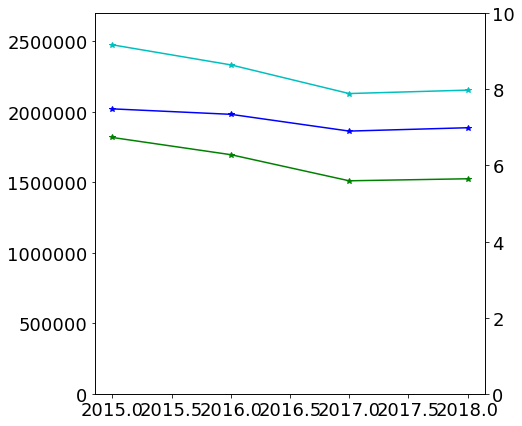

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(np.arange(2015, 2019), [total_phyto_2015, total_phyto_2016, total_phyto_2017, total_phyto_2018], 'b*-')
ax2 = ax.twinx()
ax2.plot(range(2015, 2019), [total_graze_2015, total_graze_2016, total_graze_2017, total_graze_2018], 'g*-')
ax2.plot(range(2015, 2019), [total_prod_2015, total_prod_2016, total_prod_2017, total_prod_2018], 'c*-')
ax.set_ylim((0, 270e4))
ax2.set_ylim((0, 10))

In [70]:
print (4*total_phyto_2018/(total_phyto_2015 + total_phyto_2016 + total_phyto_2017 + total_phyto_2018))
print (4*total_prod_2018/(total_prod_2015 + total_prod_2016 + total_prod_2017 + total_prod_2018))
print (4*total_graze_2016/(total_graze_2015 + total_graze_2016 + total_graze_2017 + total_graze_2018))





<xarray.DataArray ()>
array(0.9735403521595076)
Coordinates:
    time_centered  datetime64[ns] 2018-07-17
    time_counter   datetime64[ns] 2018-07-17
<xarray.DataArray ()>
array(0.9476587082430126)
Coordinates:
    time_centered  datetime64[ns] 2018-07-17
    time_counter   datetime64[ns] 2018-07-17
<xarray.DataArray ()>
array(1.0357363387961231)
Coordinates:
    time_centered  datetime64[ns] 2016-07-17
    time_counter   datetime64[ns] 2016-07-17


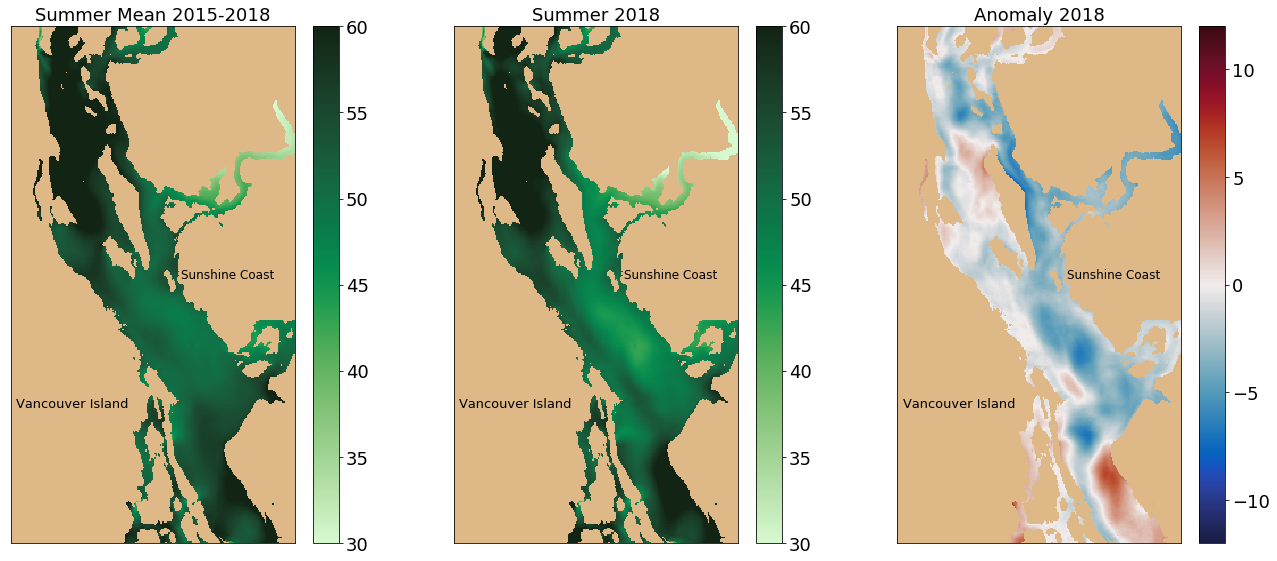

In [62]:
imin, imax = 350, 750
jmin, jmax = 100, 350
physcale = 1.

cmap = cmocean.cm.algae
cmap.set_bad('burlywood')

fig, axs = plt.subplots(1, 3,figsize = (7.5*3, 9.5*1))

#### PHYTO ####
vmax = 60
vmin = 30
s = axs[0].pcolormesh(physcale*np.ma.masked_array(tp_averages[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[0])
viz_tools.set_aspect(axs[0])
axs[0].set_title('Summer Mean 2015-2018')

s = axs[1].pcolormesh(physcale*np.ma.masked_array(t2018_totalphyto[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[1])
viz_tools.set_aspect(axs[1])
axs[1].set_title('Summer 2018')

vmax = 12
vmin = -vmax
s = axs[2].pcolormesh(physcale*np.ma.masked_array(t2018_totalphyto[imin:imax, jmin:jmax] 
                                           - tp_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[2])
viz_tools.set_aspect(axs[2])
axs[2].set_title('Anomaly 2018')

for ax in [axs[0], axs[1], axs[2]
           ]:
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
    ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='off',         # ticks along the top edge are off
    labelleft='off')
    ax.text(5, 105, 'Vancouver Island', fontsize=13)
    ax.text(150, 205, 'Sunshine Coast', fontsize=12);

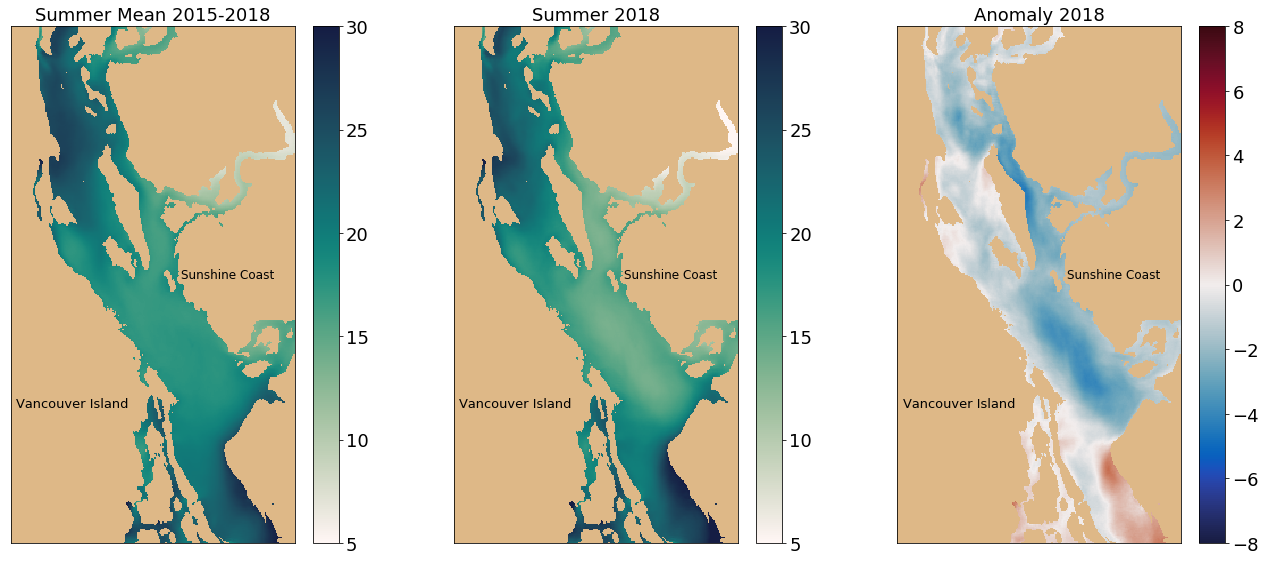

In [63]:
fig, axs = plt.subplots(1, 3,figsize = (7.5*3, 9.5*1))

#### PRODUCTIVITY ####
scale = 86400
vmax = 30
vmin = 5
cmap = cmocean.cm.tempo
cmap.set_bad('burlywood')

s = axs[0].pcolormesh(scale*np.ma.masked_array(tr_averages[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[0])
viz_tools.set_aspect(axs[0])
axs[0].set_title('Summer Mean 2015-2018')

s = axs[1].pcolormesh(scale*np.ma.masked_array(t2018_totalprod[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[1])
viz_tools.set_aspect(axs[1])
axs[1].set_title('Summer 2018')

vmax = 8
vmin = -vmax
s = axs[2].pcolormesh(scale*np.ma.masked_array(t2018_totalprod[imin:imax, jmin:jmax] 
                                           - tr_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[2])
viz_tools.set_aspect(axs[2])
axs[2].set_title('Anomaly 2018')

for ax in [axs[0], axs[1], axs[2]
           ]:
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
    ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='off',         # ticks along the top edge are off
    labelleft='off')
    ax.text(5, 105, 'Vancouver Island', fontsize=13)
    ax.text(150, 205, 'Sunshine Coast', fontsize=12);

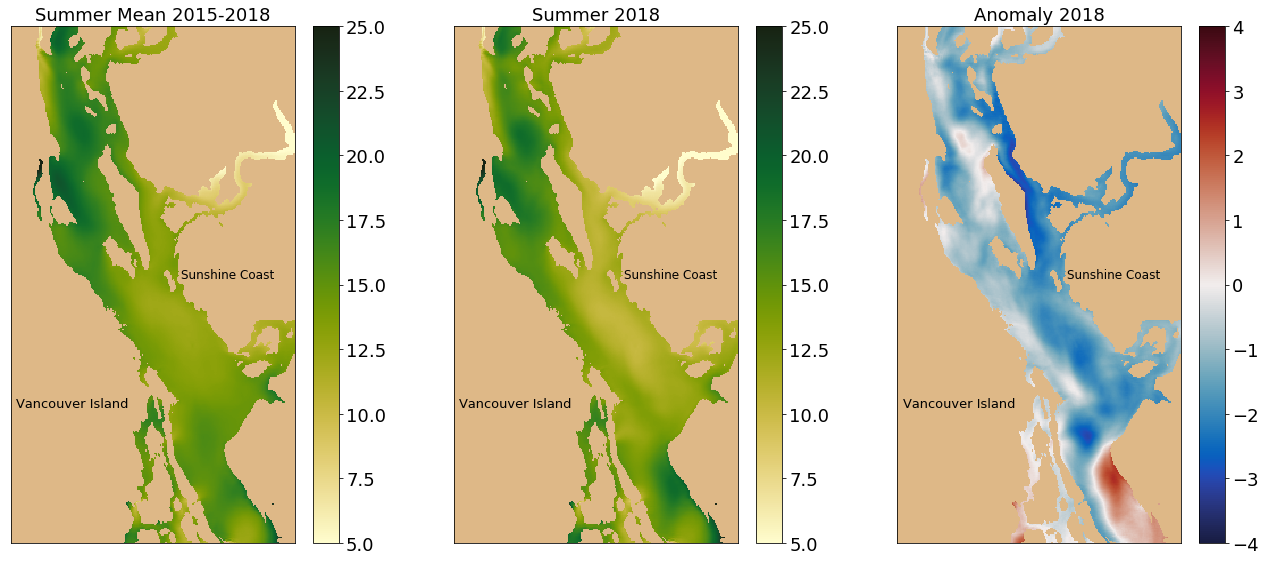

In [64]:
fig, axs = plt.subplots(1, 3,figsize = (7.5*3, 9.5*1))

#### GRAZING ####
scale = 86400
vmax = 25
vmin = 5
cmap = cmocean.cm.speed
cmap.set_bad('burlywood')

s = axs[0].pcolormesh(scale*np.ma.masked_array(tg_averages[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[0])
viz_tools.set_aspect(axs[0])
axs[0].set_title('Summer Mean 2015-2018')

s = axs[1].pcolormesh(scale*np.ma.masked_array(t2018_totalgraze[imin:imax, jmin:jmax],
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[1])
viz_tools.set_aspect(axs[1])
axs[1].set_title('Summer 2018')

vmax = 4
vmin = -vmax
s = axs[2].pcolormesh(scale*np.ma.masked_array(t2018_totalgraze[imin:imax, jmin:jmax] 
                                           - tg_averages[imin:imax, jmin:jmax], 
                                           mask = 1 - mymesh.variables['tmask'][0,22,imin:imax, jmin:jmax]), 
                        cmap = cmap2, vmin=vmin, vmax=vmax)
fig.colorbar(s, ax=axs[2])
viz_tools.set_aspect(axs[2])
axs[2].set_title('Anomaly 2018')

for ax in [axs[0], axs[1], axs[2]
           ]:
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
    ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='off',         # ticks along the top edge are off
    labelleft='off')
    ax.text(5, 105, 'Vancouver Island', fontsize=13)
    ax.text(150, 205, 'Sunshine Coast', fontsize=12);